In [1]:
#fix for scipy version 1.0.0, if using another version or new scikit-learn, could be removed
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

## Here we import the important modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## We create a dataset of 2 circles, inner circle and outer circle

In [10]:
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-1] = inner

## We create our semi-supervised method label_prop and out classifier clf

In [11]:
from sklearn import svm
from sklearn.semi_supervised import label_propagation

label_prop = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=1)
label_prop.fit(X, labels)
clf = svm.SVC(kernel='poly')

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=1 was reached without convergence.
  category=ConvergenceWarning
/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Text(0.5,1,'Raw data (2 classes=outer and inner)')

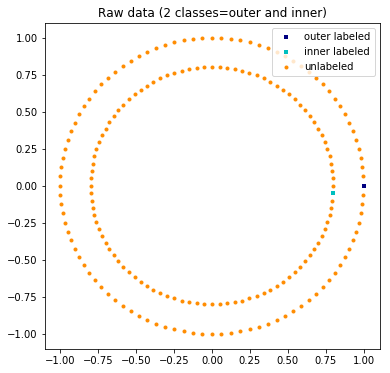

In [12]:
output_labels = label_prop.transduction_
plt.figure(figsize=(6, 6)) # todo have 2 propagations
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

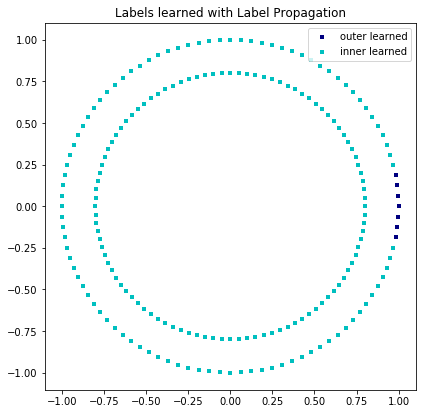

In [13]:
plt.figure(figsize=(6, 6))
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()
